## Applying Machine Learning on the Boston House Price Dataset


In [32]:
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

## Exploratory Data Analysis (EDA)

We will explore the dataset by printing it to the console and statistically evaluate columns to develop an intuition on how the data is presented. This will help us later to extract relevent features for training and testing.

In [33]:
#Import dataset from sklearn

data_boston = load_boston() #This will load the whole dataset into the variable data_boston as a dictionary. We can provide the attributes 'return_X_y = True' to just get values into                               a tuple instead of one variable.
print(data_boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [34]:
#See the keys present in the dataset
print(data_boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


We can see that there are 5 keys in the data. So lets see what the description of the dataset tells us about the features contained within the data

In [35]:
print(data_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let us now convert the dataset into a Dataframe that will be easier to handle for the rest of the code

In [36]:
dataset = pd.DataFrame(data_boston.data, columns=data_boston.feature_names, index=None)
print(dataset.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


From the description of the dataset, it seems we are missing the last column, lets load that into the same dataframe. The name of the column will be `MEDV`

In [37]:
dataset['MEDV'] = pd.DataFrame(data_boston.target)
print(dataset.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


A good practice is to check for null/missing values in the dataset, so that if there are any, we can take care of them. These values may interfere with our machine learning model.

In [38]:
print(dataset.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


There are no missing values in the dataset

Lets move on to see the shape of the dataset, this will help us to match values if need be or find any errors quickly

In [39]:
print(dataset.shape)

(506, 14)


We can see that there are 506 rows in both the dataframes and a total of (13+1) = `14` columns

In [40]:
print(dataset.std())

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
MEDV         9.197104
dtype: float64


In [41]:
print(dataset.median())


CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
MEDV        21.20000
dtype: float64


In [42]:
print(dataset.max())

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64


In [43]:
print(dataset.min())

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64


Now that we have a rough understanding of the values in the dataset, lets plot the target column to see how values are distributed

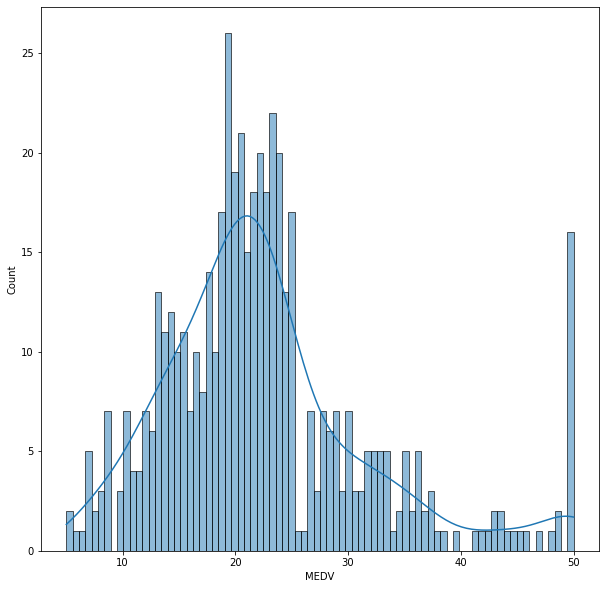

In [44]:
plt.figure(figsize=(10,10))
sns.histplot(data = dataset['MEDV'], bins=80, kde = True)
plt.show()

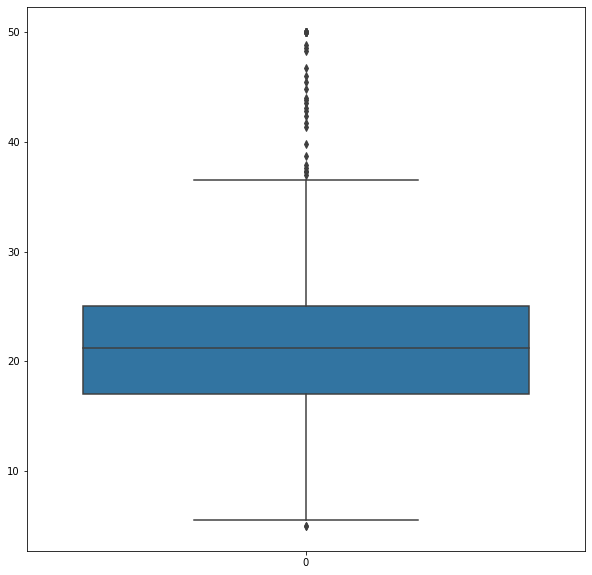

In [45]:
plt.figure(figsize=(10,10))
sns.boxplot(data = dataset['MEDV'])
plt.show()

We can see from the above graphs that the target variable has a few outliers.

To see the correlation between the the target and data, we will build a correlation matrix and find the most negative and most postive correlations between target variable and data

In [46]:
corr_matrix = dataset.corr().round(2)
print(corr_matrix)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

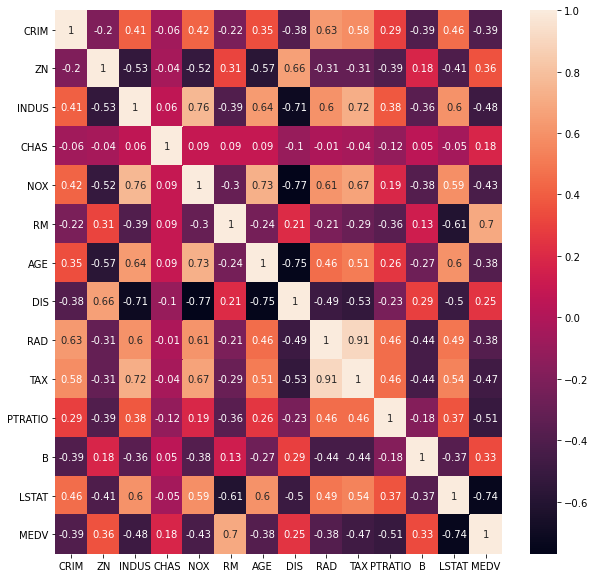

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(data = corr_matrix, annot= True)
plt.show()

From the heatmap, `LSTAT` has a strong `negative correlation` with MEDV and `RM` has a strong `positive correlation` with MEDV.

Also a point to keep in mind is to not pick features that have strong multi-colinearity for training.

Lets plot a scatter plot to see how the picked features and MEDV correlate

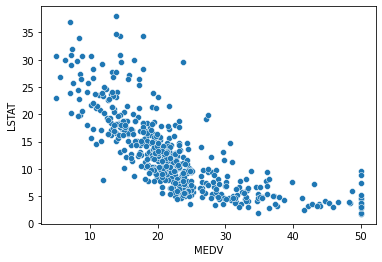

In [48]:
sns.scatterplot(x = dataset.MEDV, y = dataset.LSTAT)
plt.show()

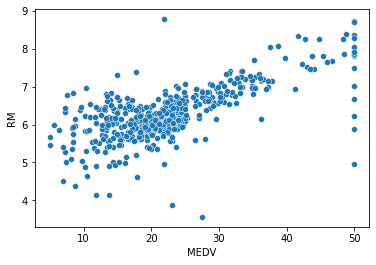

In [49]:
sns.scatterplot(x = dataset.MEDV, y = dataset.RM)
plt.show()

We can observe that there is a negative linear relationship between LSTAT and MEDV while RM and MEDV seem to have a vague linear relationship

We will now use the picked features and train our Linear Regression Model. 

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset[['LSTAT', 'RM']], dataset.MEDV, test_size = 0.25, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 2)
(127, 2)
(379,)
(127,)


In [51]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
print(linReg.score(X_test, y_test))


0.6873549116447075


### Improving Performance of our model


In [52]:
X_train, X_test, y_train, y_test = train_test_split(dataset[['LSTAT', 'RM', 'PTRATIO']], dataset.MEDV, test_size = 0.25, random_state = 1)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 3)
(127, 3)
(379,)
(127,)


In [53]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
print(linReg.score(X_test, y_test))

0.7208302494671683


Adding one more feature to the training set has bumped up the score to `72` from `68`

We will see if normalizing the data improves on the score as some feature values may have a significant effect than other feature values, we aim to reduce this effect thorugh normalization

In [54]:
feature_data = dataset[['LSTAT', 'RM', 'PTRATIO']] #prevent original data from accidentally being changed
print(feature_data.head())

   LSTAT     RM  PTRATIO
0   4.98  6.575     15.3
1   9.14  6.421     17.8
2   4.03  7.185     17.8
3   2.94  6.998     18.7
4   5.33  7.147     18.7


In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
feature_data_scaled = scaler.fit_transform(feature_data)
print(feature_data_scaled)

[[0.08967991 0.57750527 0.28723404]
 [0.2044702  0.5479977  0.55319149]
 [0.06346578 0.6943859  0.55319149]
 ...
 [0.10789183 0.65433991 0.89361702]
 [0.13107064 0.61946733 0.89361702]
 [0.16970199 0.47307913 0.89361702]]


In [56]:
X2_train, X2_test, y2_train, y2_test = train_test_split(feature_data_scaled, dataset.MEDV, test_size = 0.25, random_state = 1)


print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(379, 3)
(127, 3)
(379,)
(127,)


In [57]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
print(linReg.score(X_test, y_test))

0.7208302494671683


In [58]:
from sklearn.linear_model import Ridge

rigReg = Ridge(alpha=5.0)
rigReg.fit(X_train, y_train)
print(rigReg.score(X_test, y_test))

0.7172365623506249


In [62]:
from sklearn.preprocessing import StandardScaler

feature_data_std = StandardScaler().fit_transform(feature_data)

X3_train, X3_test, y3_train, y3_test = train_test_split(feature_data_std, dataset.MEDV, test_size = 0.25, random_state = 1)

rigReg = Ridge(alpha=1.0)
rigReg.fit(X3_train, y3_train)
print(rigReg.score(X3_test, y3_test))

0.7206737062497466


In [68]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

rigCV = RidgeCV().fit(X3_train, y3_train)
print(rigCV.score(X3_test, y3_test))
y_pred = rigCV.predict(X3_test)
print(mean_squared_error(y3_test, y_pred, squared=False))

0.7191195403581878
5.274807066053849


In [112]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=25, max_depth=8)
rfr.fit(X_train, y_train)
print(rfr.score(X_test, y_test))
y_pred_rfr = rfr.predict(X_test)
print(mean_squared_error(y_test, y_pred_rfr, squared=False))

0.8834541320925409
3.3977721781017762
